# Amazon Product Recommendation System —Industry Case Study

##### Build and evaluate a hybrid recommendation engine (content-based+ collaborative filtering) for an e-commerce platform using product metadata and user behavior data.

## Data Understanding and Pre-Processing

In [2]:
# ! pip install pandas numpy matplotlib seaborn scikit-learn scipy
# ! pip install scikit-surprise


In [3]:
# importing necessary libraries

# Data Handling
import pandas as pd
import numpy as np
import os

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error

# For recommendation models
from sklearn.neighbors import NearestNeighbors

# To suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

sns.set(style='whitegrid', palette='muted')
plt.rcParams['figure.figsize'] = (12, 6)

# pip install scikit-surprise
# from surprise import Dataset, Reader, SVD
# from surprise.model_selection import cross_validate



In [4]:
# os.getcwd()

code_path = 'c:\\Rakshith\\Salar_AI_ML_DataScience\\Product_Recommendation_System\\Code'
data_path = 'c:\\Rakshith\\Salar_AI_ML_DataScience\\Product_Recommendation_System\\Data'

In [5]:
# Load the dataset  
df_original = pd.read_csv(os.path.join(data_path, 'amazon.csv'))

# Display the first few rows of the dataset
df_original.head(3)

# Make a copy of the original DataFrame to work with
df = df_original.copy()


### Pre-Processing

In [6]:
df.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...


In [7]:
# pre-processing the data

# Remove '₹' and commas, then convert to float
df['actual_price'] = df['actual_price'].replace('[₹,]', '', regex=True).astype(float)
df['discounted_price'] = df['discounted_price'].replace('[₹,]', '', regex=True).astype(float)
df['discount_percentage'] = df['discount_percentage'].replace('%', '', regex=True).astype(float)

df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


### Dataset analysis (basic)

In [8]:
# Display shape and first few rows
print(f"Dataset Shape: {df.shape}")
print('------------------------------------------------------------')

# General info
df.info()
print('------------------------------------------------------------')

# Descriptive stats for numerical columns
df.describe()
print('------------------------------------------------------------')




Dataset Shape: (1465, 16)
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   object 
 7   rating_count         1463 non-null   object 
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  i

In [9]:
# Check for missing values
print("Checking for Missing Values:")
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])


Checking for Missing Values:
Missing Values:
 rating_count    2
dtype: int64


In [10]:
# See unique counts
print("\nUnique Counts for Each Column:")
print(df.nunique())



Unique Counts for Each Column:
product_id             1351
product_name           1337
category                211
discounted_price        550
actual_price            449
discount_percentage      92
rating                   28
rating_count           1143
about_product          1293
user_id                1194
user_name              1194
review_id              1194
review_title           1194
review_content         1212
img_link               1412
product_link           1465
dtype: int64


## Section A

### Summarize the dataset:

#### 1. Number of Unique Users, Products, and Reviews

- **Number of unique users:** 1,194  
- **Number of unique products:** 1,351  
- **Number of unique reviews:** 1,194


In [11]:
# Replace with your actual column names if different
num_users = df['user_id'].nunique()
num_products = df['product_id'].nunique()
num_reviews = df['review_id'].nunique()

print(f"Number of unique users: {num_users}")
print(f"Number of unique products: {num_products}")
print(f"Total number of reviews: {num_reviews}")



Number of unique users: 1194
Number of unique products: 1351
Total number of reviews: 1194


#### 2. Top 5 Categories by Number of Products

| Rank | Category                                                                                          | Number of Products |
|------|---------------------------------------------------------------------------------------------------|--------------------|
| 1    | Computers & Accessories → Accessories & Peripherals → Cables & Accessories → Cables → USB Cables | 233                |
| 2    | Electronics → Wearable Technology → Smart Watches                                                 | 76                 |
| 3    | Electronics → Mobiles & Accessories → Smartphones & Basic Mobiles → Smartphones                  | 68                 |
| 4    | Electronics → Home Theater, TV & Video → Televisions → Smart Televisions                          | 63                 |
| 5    | Electronics → Headphones, Earbuds & Accessories → Headphones → In-Ear                             | 52                 |


In [12]:
# Get top 5 categories
top_categories = df['category'].value_counts().head(5)
print(top_categories)


category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables    233
Electronics|WearableTechnology|SmartWatches                                           76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                  68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                         63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                          52
Name: count, dtype: int64


#### 3. Price Range and Discount Insights

- **Actual Price**
  - Minimum: ₹39.00  
  - Maximum: ₹139,900.00  
  - Median: ₹1,650.00

- **Discounted Price**
  - Minimum: ₹39.00  
  - Maximum: ₹77,990.00  
  - Median: ₹799.00

- **Discount Percentage**
  - Minimum: 0.00%  
  - Maximum: 94.00%  
  - Mean: 47.69%  
  - Median: 50.00%

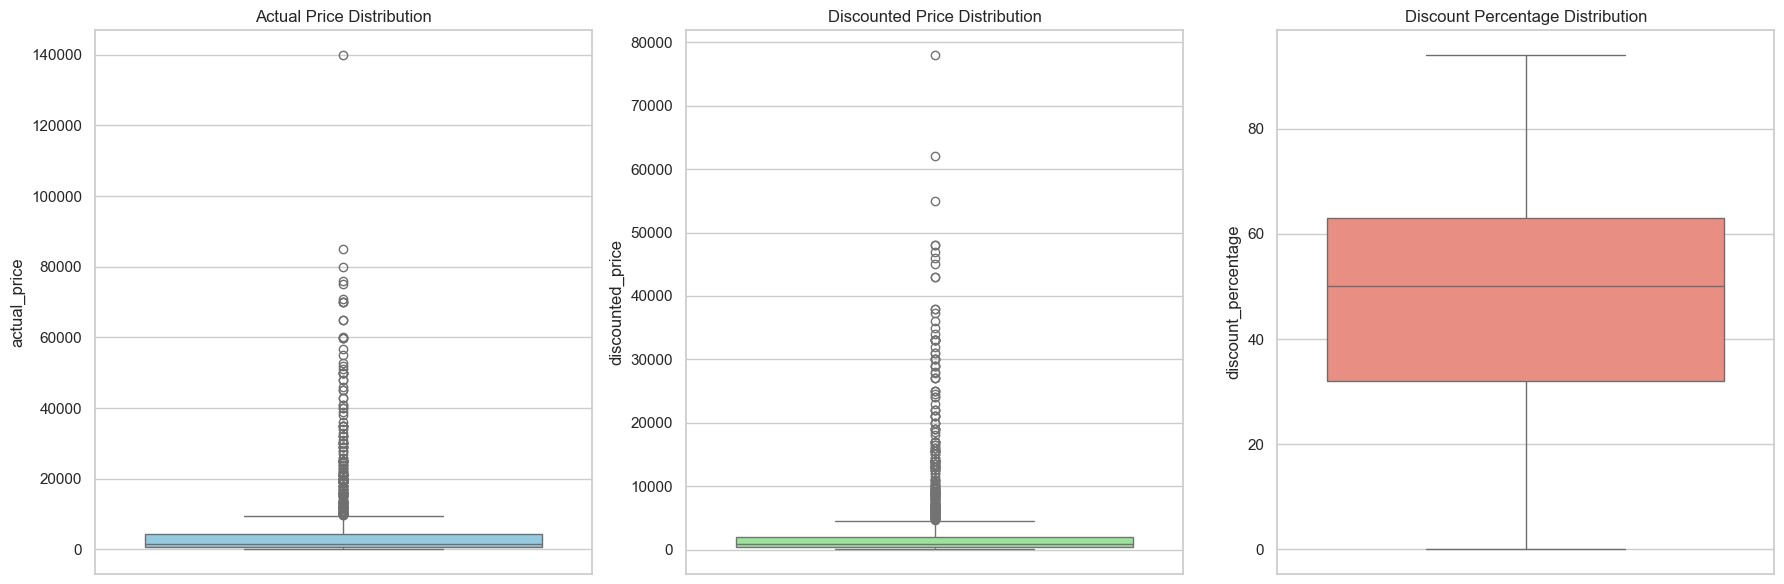

--- 

**Key Insights**:
- The actual and discounted price distributions show the presence of **high-value outliers**, as seen in the boxplots.
- The **median discounted price (₹799.00)** is **lower than the median actual price (₹1,650.00)**, reflecting a general trend of discounting.
- The discount percentage distribution has a **median of 50%** and a **mean of 47.69%**, suggesting that **half of the products are offered at a discount of 50% or less**.
- **Minimum discount is 0%**, indicating that **some products are sold at full price**.




In [13]:
# Summary statistics for actual price
actual_price_min = df['actual_price'].min()
actual_price_max = df['actual_price'].max()
actual_price_median = df['actual_price'].median()

# Summary statistics for discounted price
discounted_price_min = df['discounted_price'].min()
discounted_price_max = df['discounted_price'].max()
discounted_price_median = df['discounted_price'].median()

# Summary statistics for discount percentage
discount_pct_min = df['discount_percentage'].min()
discount_pct_max = df['discount_percentage'].max()
discount_pct_mean = df['discount_percentage'].mean()
discount_pct_median = df['discount_percentage'].median()

# Display results
print("Price and Discount Insights")
print(f"Actual Price: Min ₹{actual_price_min:.2f}, Max ₹{actual_price_max:.2f}, Median ₹{actual_price_median:.2f}")
print(f"Discounted Price: Min ₹{discounted_price_min:.2f}, Max ₹{discounted_price_max:.2f}, Median ₹{discounted_price_median:.2f}")
print(f"Discount Percentage: Min {discount_pct_min:.2f}%, Max {discount_pct_max:.2f}%, Mean {discount_pct_mean:.2f}%, Median {discount_pct_median:.2f}%")


Price and Discount Insights
Actual Price: Min ₹39.00, Max ₹139900.00, Median ₹1650.00
Discounted Price: Min ₹39.00, Max ₹77990.00, Median ₹799.00
Discount Percentage: Min 0.00%, Max 94.00%, Mean 47.69%, Median 50.00%


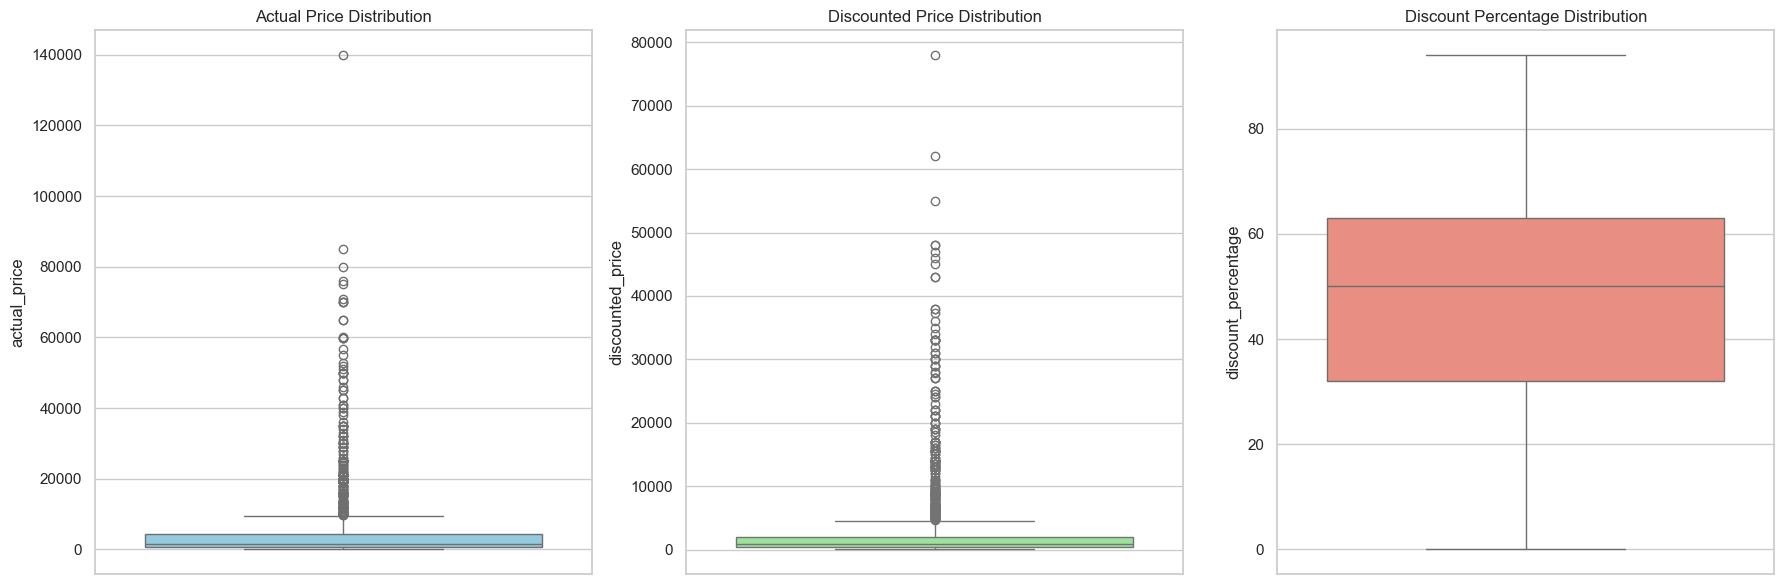

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(y=df['actual_price'], ax=axes[0], color='skyblue')
axes[0].set_title("Actual Price Distribution")

sns.boxplot(y=df['discounted_price'], ax=axes[1], color='lightgreen')
axes[1].set_title("Discounted Price Distribution")

sns.boxplot(y=df['discount_percentage'], ax=axes[2], color='salmon')
axes[2].set_title("Discount Percentage Distribution")

plt.tight_layout()
plt.show()


### Clean and preprocess the data

In [15]:
df.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...


#### Convert prices to numeric

In [16]:
# Remove '₹' and commas, then convert to float
df['actual_price'] = df['actual_price'].replace('[₹,]', '', regex=True).astype(float)
df['discounted_price'] = df['discounted_price'].replace('[₹,]', '', regex=True).astype(float)

# Remove '%' and convert to float
df['discount_percentage'] = df['discount_percentage'].replace('%', '', regex=True).astype(float)

#### Parse categories into hierarchy levels

In [ ]:
#split the category levels by '|'
category_hierarchy_df = df['category'].str.split('|', expand=True)

#Assign columns names
category_hierarchy_df.columns = [f'category_level_{i+1}' for i in category_hierarchy_df.columns]

#cancat it to the original dataframe
df = pd.concat([df, category_hierarchy_df],axis=1)

df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,review_content,img_link,product_link,category_level_1,category_level_2,category_level_3,category_level_4,category_level_5,category_level_6,category_level_7
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,"Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",...,"Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",...,"Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None


In [ ]:

df.

## Section 2